In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import numpy as np

1. Загрузить данные: 'insurance.csv'. Вывести и провести предобработку.
Вывести список уникальных регионов.

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df[df.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df = df[df.duplicated() == False]
df.reset_index()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


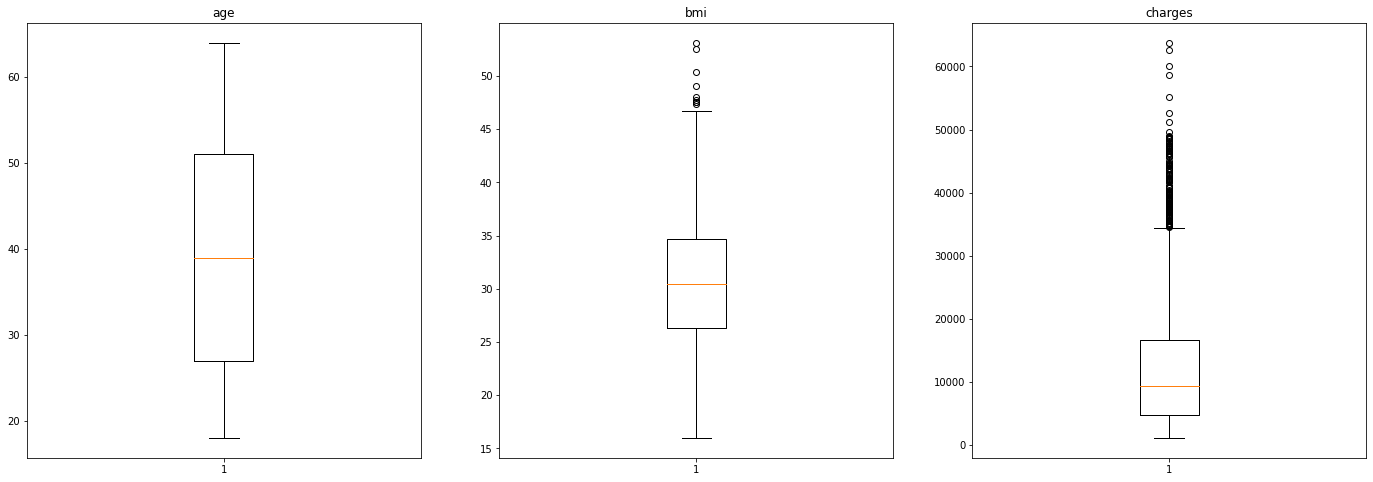

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))

ax[0].boxplot(df['age'])
ax[0].set_title('age')

ax[1].boxplot(df['bmi'])
ax[1].set_title('bmi')

ax[2].boxplot(df['charges'])
ax[2].set_title('charges')

plt.show()

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
df['charges'][(Q3 + 1.5*IQR < df['charges'])]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
df['bmi'][(Q3 + 1.5*IQR < df['bmi'])]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя первый способ, через
библиотеку Scipy.

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
sts.f_oneway(*[df['bmi'][df['region'] == item] for item in df['region'].unique()]) 
# p-value < 0.05 значит регион влияет на bmi

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

3. Выполнить однофакторный ANOVA тест, чтобы проверить влияние
региона на индекс массы тела (BMI), используя второй способ, с помощью
функции anova_lm() из библиотеки statsmodels.

**sum_sq**   
Сумма квадратов для модельных терминов.

**df**  
Степени свободы для модельных терминов.

**F**  
F статистическое значение для значимости добавления модельных терминов.

**PR(>F)**  
P-значение значимости добавления модельных терминов.



In [ ]:
model = ols('bmi ~ region', data=df[['bmi','region']]).fit()
table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
region,4057.813904,3.0,39.485939,1.908729e-24
Residual,45662.381091,1333.0,NaN,NaN


4. С помощью t критерия Стьюдента перебрать все пары. Определить
поправку Бонферрони. Сделать выводы.


In [ ]:
for item in combinations(df['region'].unique(), 2):
  print(item)
  print(sts.ttest_ind(df['bmi'][df['region'] == item[0]],
                      df['bmi'][df['region'] == item[1]])) # p-value < 0.0083(3) значит регион влияет на bmi

('southwest', 'southeast')
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
('southwest', 'northwest')
Ttest_indResult(statistic=3.289593460501664, pvalue=0.0010577505931067947)
('southwest', 'northeast')
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
('southeast', 'northwest')
Ttest_indResult(statistic=9.252137489219615, pvalue=2.7504255547794223e-19)
('southeast', 'northeast')
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
('northwest', 'northeast')
Ttest_indResult(statistic=0.05038637314068614, pvalue=0.9598300701853016)


5. Выполнить пост-хок тесты Тьюки и построить график.

In [ ]:
sts.t.interval(alpha=0.90, df=len(df['bmi'])-1,
			loc=np.mean(df['bmi']),
			scale=sts.sem(df['bmi']))


(30.388835665792826, 30.938067849540012)

In [ ]:
tukey = pairwise_tukeyhsd(df['bmi'], df['region'], 0.05)

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,0.9,-1.1609,1.2048,False
northeast,southeast,4.1825,0.001,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.001,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.5831,True
southeast,southwest,-2.7594,0.001,-3.9083,-1.6104,True


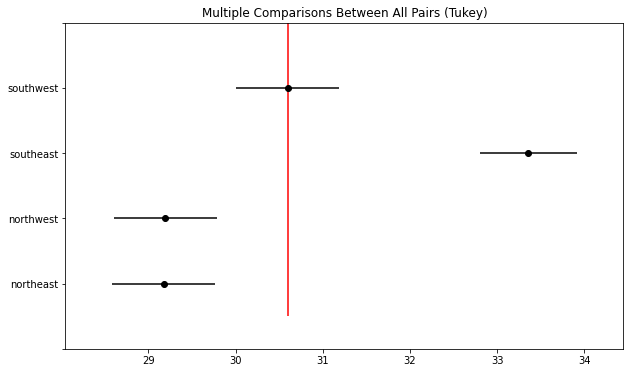

In [ ]:
tukey.plot_simultaneous()
plt.vlines(x = 30.6, ymin = -0.5, ymax = 4.5, color = "red")

6. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние
региона и пола на индекс массы тела (BMI), используя функцию anova_lm()
из библиотеки statsmodels.


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
model2 = ols('bmi ~ region + sex + sex:region', data=df[['bmi','region', 'sex']]).fit()
table2 = sm.stats.anova_lm(model2, typ=2)
table2

,sum_sq,df,F,PR(>F)
region,4036.141807,3.0,39.381780,2.215903e-24
sex,85.359929,1.0,2.498643,1.141824e-01
sex:region,175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


7. Выполнить пост-хок тесты Тьюки и построить график.

In [ ]:
df['combo'] = df['region'] + '/' + df['sex']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,bmi,children,smoker,region,charges,combo
0,19,female,27.900,0,yes,southwest,16884.92400,southwest/female
1,18,male,33.770,1,no,southeast,1725.55230,southeast/male
2,28,male,33.000,3,no,southeast,4449.46200,southeast/male
3,33,male,22.705,0,no,northwest,21984.47061,northwest/male
4,32,male,28.880,0,no,northwest,3866.85520,northwest/male
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,northwest/male
1334,18,female,31.920,0,no,northeast,2205.98080,northeast/female
1335,18,female,36.850,0,no,southeast,1629.83350,southeast/female
1336,21,female,25.800,0,no,southwest,2007.94500,southwest/female


In [ ]:
tukey2 = pairwise_tukeyhsd(df['bmi'], df['combo'], 0.05)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast/female,northeast/male,-0.2998,0.9,-2.2713,1.6717,False
northeast/female,northwest/female,-0.0464,0.9,-2.0149,1.9222,False
northeast/female,northwest/male,-0.2133,0.9,-2.194,1.7673,False
northeast/female,southeast/female,3.3469,0.001,1.4093,5.2846,True
northeast/female,southeast/male,4.6657,0.001,2.7627,6.5686,True
northeast/female,southwest/female,0.7362,0.9,-1.2384,2.7107,False
northeast/female,southwest/male,1.8051,0.101,-0.1664,3.7767,False
northeast/male,northwest/female,0.2534,0.9,-1.709,2.2158,False
northeast/male,northwest/male,0.0864,0.9,-1.8882,2.061,False
northeast/male,southeast/female,3.6467,0.001,1.7153,5.5782,True


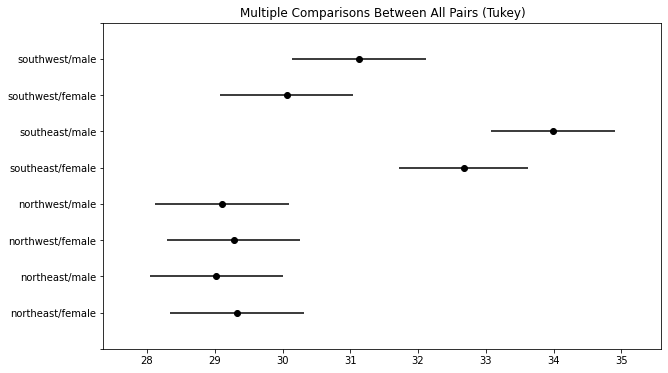

In [ ]:
tukey2.plot_simultaneous()